In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import LabelEncoder
import scipy.stats as ss
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split as tts, GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler,SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,classification_report, confusion_matrix

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
data=pd.read_csv("/content/drive/My Drive/Boot Camp Hackathon/data.csv")
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
(data["isFlaggedFraud"].value_counts()/data.shape[0])*100

0    99.999749
1     0.000251
Name: isFlaggedFraud, dtype: float64

Data is a classic case Data Imbalance, we will have to tackle this problem with the help of Over-Sampling or Under-Sampling 

In [4]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [0]:
new_data=data.copy()
le=LabelEncoder()
new_data["type"]=le.fit_transform(new_data["type"])

Creating Base Model without any Feature Engineering

In [0]:
std=StandardScaler()
X=new_data.drop(["step","nameOrig","nameDest","isFraud"],1)
X_std=std.fit_transform(X)
y=new_data["isFraud"]

In [0]:
X_train,X_test,y_train,y_test=tts(X_std,y,test_size=0.25,random_state=6)

For tackling Data Imbalance let's try Random Undersampling first, since we have good amount of data

In [9]:
rus=RandomUnderSampler(random_state=10)
X_train,y_train=rus.fit_sample(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


### Logistic Regression

In [0]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred_logreg1=logreg.predict(X_test)

In [11]:
print("F1 Score for Logistic Regression base model: ",f1_score(y_test,y_pred_logreg1,average='weighted'))
print("Precision Score for Logistic Regression base model: ",precision_score(y_test,y_pred_logreg1))
print("Recall Score for Logistic Regression base model: ",recall_score(y_test,y_pred_logreg1))

F1 Score for Logistic Regression base model:  0.9916005167671116
Precision Score for Logistic Regression base model:  0.06349206349206349
Recall Score for Logistic Regression base model:  0.7518500246669956


In [12]:
print(classification_report(y_test,y_pred_logreg1))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99   1588628
           1       0.06      0.75      0.12      2027

    accuracy                           0.99   1590655
   macro avg       0.53      0.87      0.55   1590655
weighted avg       1.00      0.99      0.99   1590655



Text(0.5, 0, 'Feature Importance')

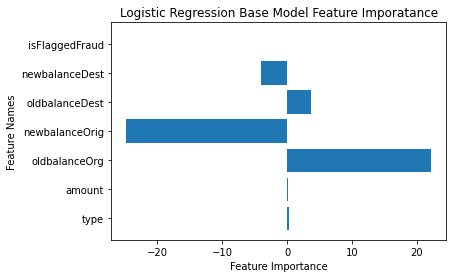

In [13]:
plt.barh(list(X),logreg.coef_[0])
plt.title("Logistic Regression Base Model Feature Imporatance")
plt.ylabel("Feature Names")
plt.xlabel("Feature Importance")

### Decision Tree Classifier

In [0]:
dt=DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)
y_pred_dt1=dt.predict(X_test)

In [15]:
print("F1 Score for Decision Tree base model: ",f1_score(y_test,y_pred_dt1,average='weighted'))
print("Precision Score for Decision Tree base model: ",precision_score(y_test,y_pred_dt1))
print("Recall Score for Decision Tree base model: ",recall_score(y_test,y_pred_dt1))

F1 Score for Decision Tree base model:  0.9946783128096789
Precision Score for Decision Tree base model:  0.1280259228667641
Recall Score for Decision Tree base model:  0.9940799210656142


In [16]:
print(classification_report(y_test,y_pred_dt1))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1588628
           1       0.13      0.99      0.23      2027

    accuracy                           0.99   1590655
   macro avg       0.56      0.99      0.61   1590655
weighted avg       1.00      0.99      0.99   1590655



Text(0.5, 0, 'Feature Importance')

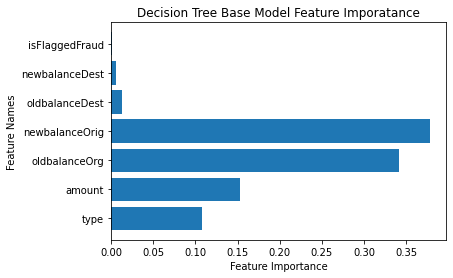

In [17]:
plt.barh(list(X),dt.feature_importances_)
plt.title("Decision Tree Base Model Feature Imporatance")
plt.ylabel("Feature Names")
plt.xlabel("Feature Importance")

### Random Forest Classifier

In [0]:
rf=RandomForestClassifier(random_state=0)
rf.fit(X_train,y_train)
y_pred_rf1=rf.predict(X_test)

In [19]:
print("F1 Score for Random Forest base model: ",f1_score(y_test,y_pred_rf1,average='weighted'))
print("Precision Score for Random Forest base model: ",precision_score(y_test,y_pred_rf1))
print("Recall Score for Random Forest base model: ",recall_score(y_test,y_pred_rf1))

F1 Score for Random Forest base model:  0.9936367637329911
Precision Score for Random Forest base model:  0.10702571156491376
Recall Score for Random Forest base model:  0.9980266403552047


In [20]:
print(classification_report(y_test,y_pred_rf1))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99   1588628
           1       0.11      1.00      0.19      2027

    accuracy                           0.99   1590655
   macro avg       0.55      0.99      0.59   1590655
weighted avg       1.00      0.99      0.99   1590655



Text(0.5, 0, 'Feature Importance')

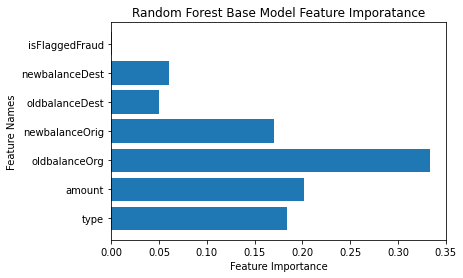

In [21]:
plt.barh(list(X),rf.feature_importances_)
plt.title("Random Forest Base Model Feature Imporatance")
plt.ylabel("Feature Names")
plt.xlabel("Feature Importance")

All these base models have really good F1 and Recall Score but really bad Precision Score.
That's the score we need to improve.

## Feature Engineering 

In [0]:
median_amt=data.groupby(["nameOrig"]).agg({"amount":'median'})
mean_amt=data.groupby(["nameOrig"]).agg({"amount":'mean'})

In [0]:
median_amt_recv=data.groupby(["nameDest"]).agg({"amount":'median'})
mean_amt_recv=data.groupby(["nameDest"]).agg({"amount":'mean'})

In [0]:
origin_mean_median=pd.merge(median_amt,mean_amt,on="nameOrig")
dest_mean_median=pd.merge(median_amt_recv,mean_amt_recv,on="nameDest")

In [0]:
data=pd.merge(data,origin_mean_median,on="nameOrig")

In [0]:
data=pd.merge(data,dest_mean_median,on="nameDest")

In [0]:
data.rename(columns={'amount_x_x':'median_amt_debit',
                          'amount_y_x':'mean_amt_debit',
                          'amount_x_y':'median_amt_recieved',
                          'amount_y_y':'mean_amt_recieved',}, 
                 inplace=True)

In [0]:
data.rename(columns={'nameOrig_y':'No_of_transactions','nameOrig_x':'nameOrig'},inplace=True)

In [29]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,median_amt_debit,mean_amt_debit,median_amt_recieved,mean_amt_recieved
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,9839.640,9839.640,9839.640,9839.640000
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,1864.280,1864.280,1864.280,1864.280000
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,181.000,181.000,139366.105,225517.832045
3,6,TRANSFER,109985.65,C570434649,41851.00,0.00,C553264065,0.00,109985.65,0,0,109985.650,109985.650,139366.105,225517.832045
4,7,CASH_IN,10256.20,C111105514,3766080.24,3776336.45,C553264065,109985.65,99729.44,0,0,23078.625,23078.625,139366.105,225517.832045


In [0]:
data["Day"]=((data['step']-1)/24).astype('int')+1
data["Hour"]=data['step']-((data['Day']-1)*24)

In [0]:
data['error_Orig'] = data['newbalanceOrig'] + data['amount'] - data['oldbalanceOrg']
data['error_Dest'] = data['oldbalanceDest'] + data['amount'] - data['newbalanceDest']

In [0]:
data.drop(['nameOrig','nameDest'],1,inplace=True)

## Feature Selection

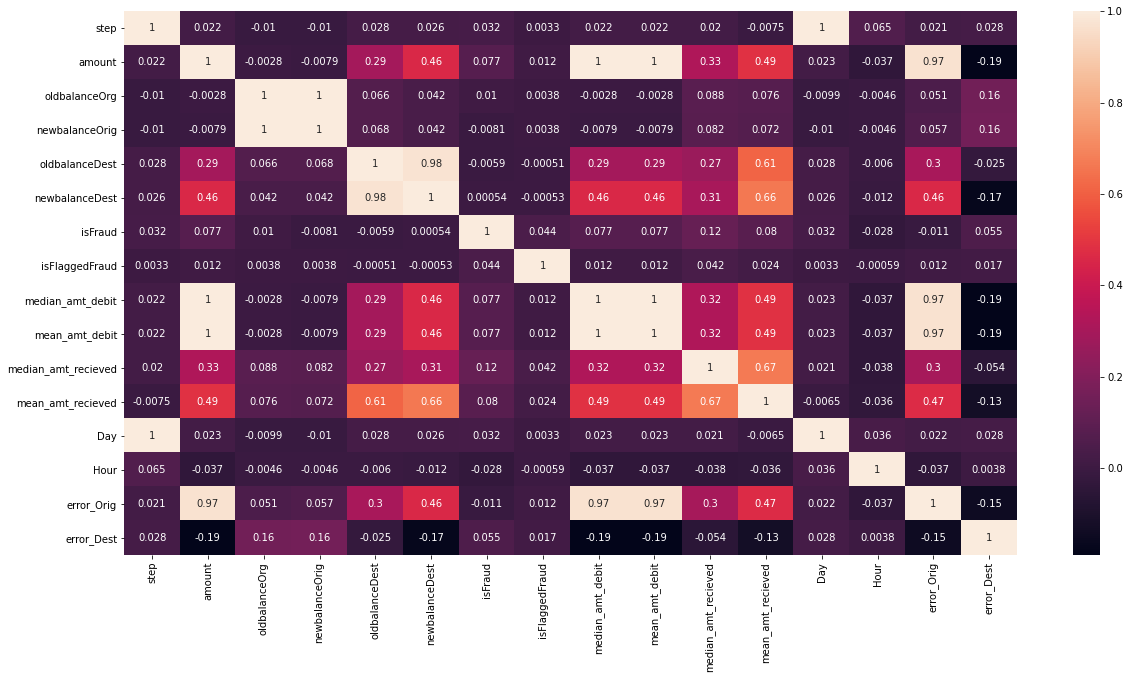

In [33]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)

In [0]:
categorical=data[["step","type","isFlaggedFraud","Day","Hour","isFraud"]]
numerical=data[set(list(data))-set(list(categorical))]

#### Feature Selection using Chi-Square Test for Categorical Features

In [35]:
def Chi_square(col_1,col_2):
    X=data[col_1].astype('str')
    Y=data[col_2].astype('str')
    observed_values=pd.crosstab(Y,X)
    chi2, p, dof, expected = ss.chi2_contingency(observed_values)
    if(p>0.05):
        print(col_1," is not required")
    else:
        print(col_1," is required")
        
for col in categorical:
    Chi_square(col,"isFraud")

step  is required
type  is required
isFlaggedFraud  is required
Day  is required
Hour  is required
isFraud  is required


#### Feature Selection for Numerical Features using Backward Feature Elimination

In [36]:
X=data[list(numerical)]
y=data["isFraud"]

import statsmodels.api as sm
cols = list(X.columns)
pmax = 1
while (pmax>0.05):
    p=[]
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        breakselected_features_BE = cols
print("Best features using Backward Elimination: ",cols)

Best features using Backward Elimination:  ['amount', 'newbalanceDest', 'error_Dest', 'error_Orig', 'oldbalanceDest', 'newbalanceOrig', 'oldbalanceOrg', 'mean_amt_recieved', 'median_amt_recieved']


## Model Building

In [0]:
data["type"]=le.fit_transform(data["type"])
X=data.drop(['isFraud','mean_amt_recieved','mean_amt_debit','isFlaggedFraud'],1)
y=data['isFraud']

In [0]:
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.25,random_state=0)

In [39]:
y_train.value_counts()

0    4765767
1       6198
Name: isFraud, dtype: int64

In [0]:
rs=RandomUnderSampler(random_state=42)

In [41]:
X_train_rus,y_train_rus=rs.fit_sample(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


### Decision Tree Classifier 

In [0]:
dtc=DecisionTreeClassifier(random_state=0)

In [0]:
dtc.fit(X_train_rus,y_train_rus)
y_pred_dtc=dtc.predict(X_test)

In [44]:
print("F1 Score for Decision Tree Model (with added features): ",f1_score(y_test,y_pred_dtc,average='weighted'))
print("Precision Score for Decision Tree Model (with added features): ",precision_score(y_test,y_pred_dtc))
print("Recall Score for Decision Tree Model (with added features): ",recall_score(y_test,y_pred_dtc))

F1 Score for Decision Tree Model (with added features):  0.9968409690181183
Precision Score for Decision Tree Model (with added features):  0.21318611317549635
Recall Score for Decision Tree Model (with added features):  0.9965260545905708


In [45]:
print(classification_report(y_test,y_pred_dtc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588640
           1       0.21      1.00      0.35      2015

    accuracy                           1.00   1590655
   macro avg       0.61      1.00      0.67   1590655
weighted avg       1.00      1.00      1.00   1590655



Text(0.5, 0, 'Feature Importance')

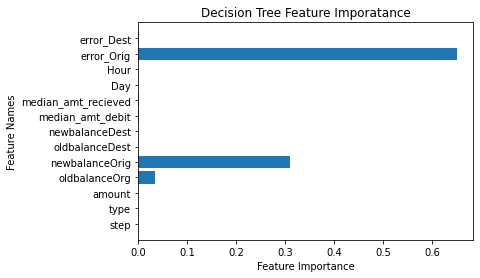

In [46]:
plt.barh(list(X),list(dtc.feature_importances_))
plt.title("Decision Tree Feature Imporatance")
plt.ylabel("Feature Names")
plt.xlabel("Feature Importance")

### Decision Tree Classifier Best Model using GridSearchCV

In [0]:
param_dtc={"criterion":['entropy','gini'],
           "max_depth":np.arange(2,11),
           "min_samples_split":np.arange(2,6),
           'max_features':['auto','sqrt','log2']}

In [0]:
dtc_cv=GridSearchCV(estimator=dtc,param_grid=param_dtc,cv=5,scoring="f1_weighted")

In [49]:
dtc_cv.fit(X_train_rus,y_train_rus)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,

In [50]:
dtc_cv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [0]:
y_pred_dtcv=dtc_cv.best_estimator_.predict(X_test)

In [53]:
print("F1 Score for Decision Tree Best Estimator (with added features): ",f1_score(y_test,y_pred_dtcv,average='weighted'))
print("Precision Score for Decision Tree Best Estimator (with added features): ",precision_score(y_test,y_pred_dtcv))
print("Recall Score for Decision Tree Estimator (with added features): ",recall_score(y_test,y_pred_dtcv))

F1 Score for Decision Tree Best Estimator (with added features):  0.9978416223407832
Precision Score for Decision Tree Best Estimator (with added features):  0.300074794315632
Recall Score for Decision Tree Estimator (with added features):  0.9955334987593052


In [54]:
print(classification_report(y_test,y_pred_dtcv))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588640
           1       0.30      1.00      0.46      2015

    accuracy                           1.00   1590655
   macro avg       0.65      1.00      0.73   1590655
weighted avg       1.00      1.00      1.00   1590655



Text(0.5, 0, 'Feature Importance')

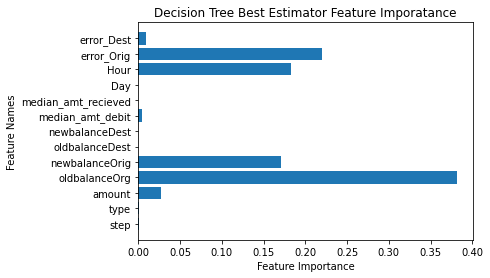

In [55]:
plt.barh(list(X),list(dtc_cv.best_estimator_.feature_importances_))
plt.title("Decision Tree Best Estimator Feature Imporatance")
plt.ylabel("Feature Names")
plt.xlabel("Feature Importance")

### Random Forest Classifier

In [0]:
rfc=RandomForestClassifier(random_state=0)

In [0]:
rfc.fit(X_train_rus,y_train_rus)
y_pred_rfc=rfc.predict(X_test)

In [58]:
print("F1 Score for Random Forest Estimator (with added features): ",f1_score(y_test,y_pred_rfc,average='weighted'))
print("F1 Score for Random Forest Estimator (with added features): ",precision_score(y_test,y_pred_rfc))
print("F1 Score for Random Forest Estimator (with added features): ",recall_score(y_test,y_pred_rfc))

F1 Score for Random Forest Estimator (with added features):  0.9999108628517847
F1 Score for Random Forest Estimator (with added features):  0.9365375641623892
F1 Score for Random Forest Estimator (with added features):  0.996029776674938


Text(0.5, 0, 'Feature Importance')

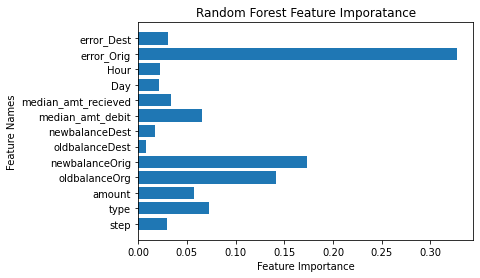

In [59]:
plt.barh(list(X),list(rfc.feature_importances_))
plt.title("Random Forest Feature Imporatance")
plt.ylabel("Feature Names")
plt.xlabel("Feature Importance")

In [60]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588640
           1       0.94      1.00      0.97      2015

    accuracy                           1.00   1590655
   macro avg       0.97      1.00      0.98   1590655
weighted avg       1.00      1.00      1.00   1590655



### Random Forest Best Model using GridSearchCV

In [0]:
param_rfc={"criterion":['entropy','gini'],
           "max_depth":np.arange(2,11),
           "min_samples_split":np.arange(2,6),
           'max_features':['auto','sqrt','log2']}

In [0]:
rfc_cv=GridSearchCV(estimator=rfc,param_grid=param_rfc,cv=5)

In [63]:
rfc_cv.fit(X_train_rus,y_train_rus)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [64]:
rfc_cv.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
y_pred_rfcv=rfc_cv.best_estimator_.predict(X_test)

In [66]:
print("F1 Score for Random Forest Best Estimator (with added features): ",f1_score(y_test,y_pred_rfcv,average='weighted'))
print("Precision Score for Random Forest Best Estimator (with added features): ",precision_score(y_test,y_pred_rfcv))
print("Recall Score for Random Forest Best Estimator (with added features): ",recall_score(y_test,y_pred_rfcv))

F1 Score for Random Forest Best Estimator (with added features):  0.999950716658243
Precision Score for Random Forest Best Estimator (with added features):  0.965832531280077
Recall Score for Random Forest Best Estimator (with added features):  0.996029776674938


Text(0.5, 0, 'Feature Importance')

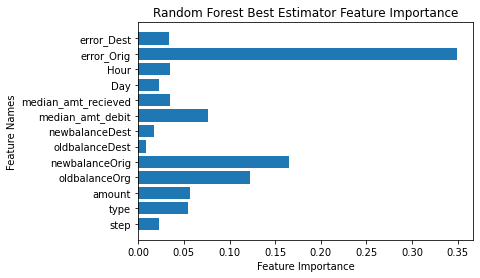

In [67]:
plt.barh(list(X),list(rfc_cv.best_estimator_.feature_importances_))
plt.title("Random Forest Best Estimator Feature Importance")
plt.ylabel("Feature Names")
plt.xlabel("Feature Importance")

In [68]:
print(classification_report(y_test,y_pred_rfcv))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588640
           1       0.97      1.00      0.98      2015

    accuracy                           1.00   1590655
   macro avg       0.98      1.00      0.99   1590655
weighted avg       1.00      1.00      1.00   1590655

